# Task 5: Feature Engineering

In [9]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt


In [11]:
# Load dataset
filepath = r"/Users/rosepeterfunja/Tanzania_KIC/Assignment/machine-learning-linear-regression-rhysrose/BostonHousing.csv"
df = pd.read_csv(filepath)


In [19]:
print(df.columns)

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')


In [21]:

# Split the data into features and target
X = df.drop('medv', axis=1)  # Features (all columns except 'MEDV')
y = df['medv']  # Target variable (MEDV)

In [27]:
# Feature Engineering: Polynomial Features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
# Interaction Term Example: RM * LSTAT
X['RM_LSTAT_interaction'] = X['rm'] * X['lstat']

# Log Transformation for highly skewed features
X['CRIM_log'] = np.log1p(X['crim'])
X['TAX_log'] = np.log1p(X['tax'])

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Handle missing values (impute with median for simplicity)
X.fillna(X.median(), inplace=True)


In [29]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model Training: Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation: MSE and R² Score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)


Mean Squared Error (MSE): 16.765969011750187
R² Score: 0.7713745522292736


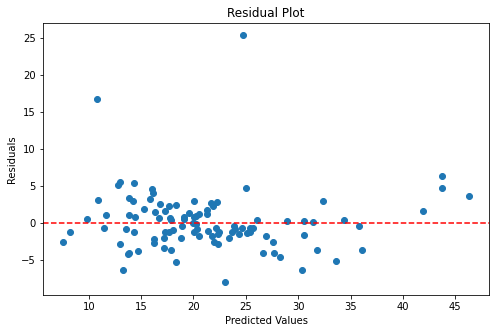

In [31]:
# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


